In [ ]:
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=318069 sha256=fdef68400e5c5b0ec54402b7eac391818ce089382923bf9b6daa45bcdc1f9b8b
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Load R
%reload_ext rpy2.ipython

In [ ]:
%%R
install.packages("tidyverse")
install.packages("modelr")
install.packages("lubridate")

(as ‘lib’ is unspecified)





























	‘/tmp/RtmpdMgXyw/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpdMgXyw/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpdMgXyw/downloaded_packages’



In [2]:
%%R
library(tidyverse)
library(modelr)
library(lubridate)

NotImplementedError: ignored

In [ ]:
%%R
data_folder <- "/content/drive/MyDrive/Int-CD/btc/data"
## Carga de csv
btc_data <- read_csv(file.path(data_folder, 'BTC/BTC-USD_hist.csv'))
oro_data <- read_csv(file.path(data_folder, 'GOLD/GC=F_hist.csv'))
brent_data <- read_csv(file.path(data_folder, 'BRENT/BZ=F_hist.csv'))
wti_data <-read_csv(file.path(data_folder, 'WTI/CL=F_hist.csv'))
nasdaq_data <- read_csv(file.path(data_folder, 'NASDAQ/^IXIC_hist.csv'))
sp500_data <- read_csv(file.path(data_folder, 'SP500/^GSPC_hist.csv'))
fed_data <- read_csv(file.path(data_folder, 'FED/FEDFUNDS.csv'))
pbi_data <- read_csv(file.path(data_folder, 'FED/GDP.csv'))
desempleo <- read_csv(file.path(data_folder, 'FED/unemployment.csv'))

Rows: 3189 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (7): Open, High, Low, Close, Volume, Dividends, Stock Splits
dttm (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 5716 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (7): Open, High, Low, Close, Volume, Dividends, Stock Splits
dttm (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3938 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (7): Open, High, Low, Close, Volume, Dividends, Stock Splits
dttm (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column

In [ ]:
# indicate that you're running R code
%%R
# Operaciones
oro_data$Date <- as.Date(oro_data$Date)
brent_data$Date <- as.Date(brent_data$Date)
wti_data$Date <- as.Date(wti_data$Date)
nasdaq_data$Date <- as.Date(nasdaq_data$Date)
sp500_data$Date <- as.Date(sp500_data$Date)

# Unimos todo en un unico dataframe
combined_data <- inner_join(btc_data, oro_data, by = "Date", suffix = c("_btc", "_oro"))
combined_data <- inner_join(combined_data, brent_data, by = "Date", suffix = c("", "_brent"))
combined_data <- inner_join(combined_data, wti_data, by = "Date", suffix = c("", "_wti"))
combined_data <- inner_join(combined_data, sp500_data, by = "Date", suffix = c("", "_sp500"))
combined_data <- inner_join(combined_data, nasdaq_data, by = "Date", suffix = c("", "_nasdaq"))
combined_data_FED <- inner_join(fed_data, pbi_data, by = "DATE")
combined_data_FED <- inner_join(combined_data_FED, desempleo, by = "DATE")

combined_data <- as.data.frame(combined_data)
combined_data_FED <- as.data.frame(combined_data_FED)
names(combined_data)[names(combined_data) == "Open"] <- "Open_brent"
names(combined_data)[names(combined_data) == "High"] <- "High_brent"
names(combined_data)[names(combined_data) == "Low"] <- "Low_brent"
names(combined_data)[names(combined_data) == "Close"] <- "Close_brent"
names(combined_data)[names(combined_data) == "Volume"] <- "Volume_brent"
names(combined_data)[names(combined_data) == "Dividens"] <- "Dividens_brent"
names(combined_data)[names(combined_data) == "Stock Splits"] <- "Stock Splits_brent"
names(combined_data_FED)[names(combined_data_FED) == "GDP"] <- "PBI"
names(combined_data_FED)[names(combined_data_FED) == "UNRATE"] <- "desempleo"
names(combined_data_FED)[names(combined_data_FED) == "DATE"] <- "Date"
names(combined_data_FED)[names(combined_data_FED) == "FEDFUNDS"] <- "FED"

In [ ]:
%%R
str(combined_data)

spc_tbl_ [2,194 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Date              : POSIXct[1:2194], format: "2014-09-17" "2014-09-18" ...
 $ Open              : num [1:2194] 466 457 424 399 402 ...
 $ High              : num [1:2194] 468 457 428 407 442 ...
 $ Low               : num [1:2194] 452 413 385 397 396 ...
 $ Close             : num [1:2194] 457 424 395 402 436 ...
 $ Volume            : num [1:2194] 21056800 34483200 37919700 24127600 45099500 ...
 $ Dividends         : num [1:2194] 0 0 0 0 0 0 0 0 0 0 ...
 $ Stock Splits      : num [1:2194] 0 0 0 0 0 0 0 0 0 0 ...
 $ Open_brent        : num [1:2194] 99 98.6 97.5 98.2 96.9 ...
 $ High_brent        : num [1:2194] 99.5 99.1 98.5 98.2 97.6 ...
 $ Low_brent         : num [1:2194] 98.5 97.4 97.2 96.4 96.6 ...
 $ Close_brent       : num [1:2194] 99 97.7 98.4 97 96.8 ...
 $ Volume_brent      : num [1:2194] 14769 15316 12442 12582 13561 ...
 $ Dividends_brent   : num [1:2194] 0 0 0 0 0 0 0 0 0 0 ...
 $ Stock Splits_brent: num [1:2

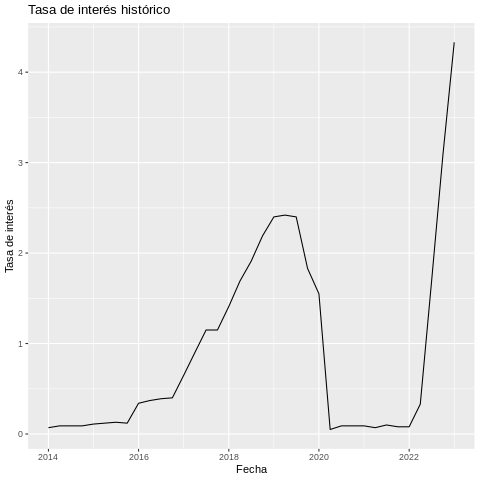

In [ ]:
%%R
# Gráficos
# Precio Bitcoin a lo largo del tiempo
ggplot(combined_data, aes(x = Date, y = Close_btc)) +
  geom_line() +
  labs(x = "Fecha", y = "Precio BTC [USD]", title = "Precio del Bitcoin a lo largo del tiempo [2014-2023]")

ggplot(combined_data, aes(x = Date, y = Close_sp500)) +
  geom_line() +
  labs(x = "Fecha", y = "Precio Sp500 [USD]", title = "Precio del Sp500 a lo largo del tiempo [2014-2023]") #+
  #coord_cartesian(ylim = c(2000, 2350))

ggplot(combined_data, aes(x = Date, y = Close_nasdaq)) +
  geom_line() +
  labs(x = "Fecha", y = "Precio Nasdaq [USD]", title = "Precio del Nasdaq a lo largo del tiempo [2014-2023]")

# Se incluye la Tasa de interes
# Filtrar los datos antes de 2014
filtered_data <- combined_data_FED[combined_data_FED$Date >= as.Date("2014-01-01"), ]

# Crear el gráfico utilizando los datos filtrados
ggplot(filtered_data, aes(x = Date, y = FED)) +
  geom_line() +
  labs(x = "Fecha", y = "Tasa de interés", title = "Tasa de interés histórico")


             Close_btc Close_oro Close_brent Close_wti Close_sp500 Close_nasdaq
Close_btc    1.0000000 0.7628025   0.5076638 0.5405071   0.8974628    0.9155059
Close_oro    0.7628025 1.0000000   0.3811829 0.4115782   0.8946535    0.9034099
Close_brent  0.5076638 0.3811829   1.0000000 0.9890124   0.5960337    0.4997806
Close_wti    0.5405071 0.4115782   0.9890124 1.0000000   0.6128410    0.5218343
Close_sp500  0.8974628 0.8946535   0.5960337 0.6128410   1.0000000    0.9853551
Close_nasdaq 0.9155059 0.9034099   0.4997806 0.5218343   0.9853551    1.0000000


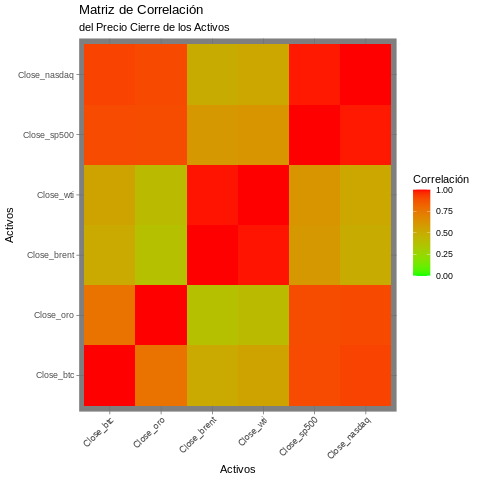

In [ ]:
%%R
# Matriz de correlacion
cor_data <- select(combined_data, Close_btc, Close_oro, Close_brent, Close_wti, Close_sp500, Close_nasdaq)
correlation_matrix <- cor(cor_data)
print(correlation_matrix)


# Convertir la matriz de correlación en un dataframe para facilitar el gráfico
cor_df <- as.data.frame(as.table(correlation_matrix))
cor_df <- cor_df %>%
  rename(Variable1 = Var1, Variable2 = Var2, Correlation = Freq)

# Gráfico de barras de la matriz de correlación
ggplot(cor_df, aes(x = Variable1, y = Variable2, fill = Correlation)) +
  geom_tile() +
  scale_fill_gradient(low = "green", high = "red",
                      limits = c(0, 1),
                      na.value = "transparent") +
  labs(x = "Activos", y = "Activos", fill = "Correlación", title = "Matriz de Correlación", subtitle = "del Precio Cierre de los Activos") +
  theme_dark() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Volatilidad (BTC vs ORO)

In [ ]:
%%R
## Carga de dataset
orodf <- read_csv(file.path(data_folder,'GOLD/GC=F_hist.csv'))
btcdf <- read_csv(file.path(data_folder,'BTC/BTC-USD_hist.csv'))
glimpse(orodf)

## Operaciones
orodf <- orodf %>% mutate(Diff = High - Low)
btcdf <- btcdf %>% mutate(Diff = High - Low)

Rows: 5716 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (7): Open, High, Low, Close, Volume, Dividends, Stock Splits
dttm (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3189 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (7): Open, High, Low, Close, Volume, Dividends, Stock Splits
dttm (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 5,716
Columns: 8
$ Date           <dttm> 2000-08-30 04:00:00, 2000-08-31 04:00:00, 2000-09-01 0…
$ Open           <dbl> 273.9, 274.8, 277.0, 275.8, 274.2, 274.0, 273.3, 273.1,…
$ High           <dbl> 273.9, 278.3, 277.0, 275.8, 274.2, 274.0, 273.3, 273.1,…
$ Low            <dbl> 273.9,

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


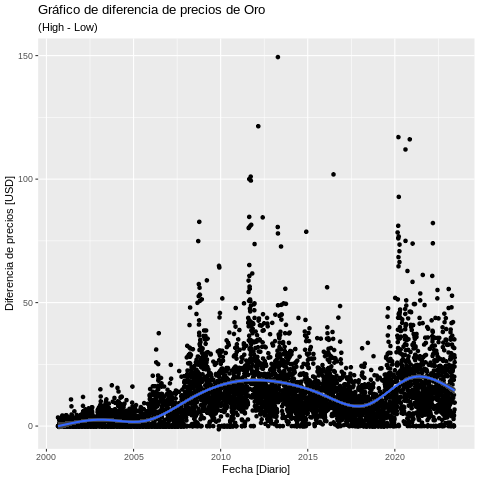

In [ ]:
%%R
# Graficos
## Oro
ggplot(orodf, aes(x = Date, y = Diff)) +
  geom_point() +
  stat_smooth() +
  labs(title = "Gráfico de diferencia de precios de Oro",
       subtitle = "(High - Low)",
       x = "Fecha [Diario]",
       y = "Diferencia de precios [USD]")

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


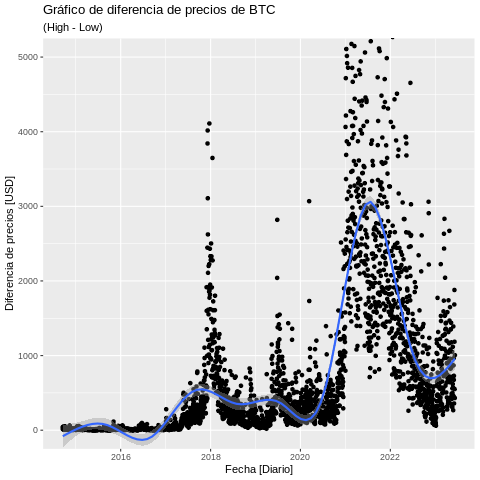

In [ ]:
%%R
## BTC
ggplot(btcdf, aes(x = Date, y = Diff)) +
  geom_point() +
  stat_smooth() +
  coord_cartesian(ylim = c(0, 5000)) +
  labs(title = "Gráfico de diferencia de precios de BTC",
       subtitle = "(High - Low)",
       x = "Fecha [Diario]",
       y = "Diferencia de precios [USD]")

In [ ]:
%%R
# Cálculo de la desviación estándar
btc_volatility <- sd(btcdf$Diff)
oro_volatility <- sd(orodf$Diff)